In [1]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
with open('data/perazki1.txt') as f:
  l=f.readlines()

1. Подсчитать число стихов в представленном файле

In [3]:
l.count('\n')

38070

In [4]:
(len(l)-l.count('\n'))/4

38070.5

2. Найти топ-20 по частоте слов, встречающихся в стихах

In [5]:
text=''.join(l).split()

In [6]:
Counter(text).most_common(20)

[('и', 29939),
 ('в', 22026),
 ('не', 13506),
 ('на', 12651),
 ('я', 11020),
 ('а', 10740),
 ('с', 7208),
 ('что', 6028),
 ('как', 5432),
 ('но', 4005),
 ('у', 3600),
 ('олег', 3591),
 ('он', 3490),
 ('ты', 3467),
 ('по', 3436),
 ('мне', 3332),
 ('за', 3316),
 ('из', 3186),
 ('то', 3070),
 ('к', 2999)]

In [7]:
text=''.join(l)

In [8]:
Counter(re.split('[ \t\n.,:!]',text)).most_common(21)[1:]

[('и', 29939),
 ('в', 22026),
 ('не', 13506),
 ('на', 12651),
 ('я', 11020),
 ('а', 10740),
 ('с', 7208),
 ('что', 6028),
 ('как', 5432),
 ('но', 4005),
 ('у', 3600),
 ('олег', 3591),
 ('он', 3490),
 ('ты', 3467),
 ('по', 3436),
 ('мне', 3332),
 ('за', 3316),
 ('из', 3186),
 ('то', 3070),
 ('к', 2999)]

<Axes: xlabel='0'>

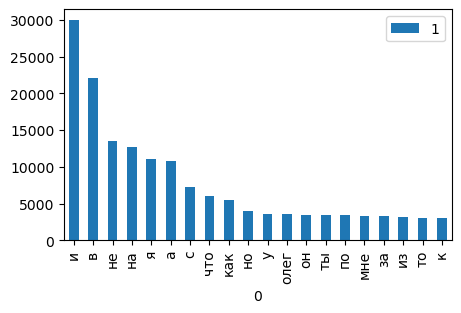

In [9]:
pd.DataFrame(Counter(re.split('[ \t\n.,:!]',text)).most_common(21)[1:]).plot(x=0,y=1,kind='bar',figsize=(5,3))

3. Найти топ-20 по частоте информативных (не предлоги, не мат, т.е. слова описывающий смысл стиха) слов, встречающихся в стихах

In [10]:
Counter(re.findall('[а-я-]{4,}',text)).most_common(20)

[('олег', 3591),
 ('когда', 2705),
 ('меня', 1981),
 ('сказал', 1615),
 ('чтоб', 1473),
 ('оксана', 1348),
 ('потом', 1195),
 ('есть', 1098),
 ('только', 1042),
 ('вдруг', 1014),
 ('теперь', 954),
 ('тебя', 857),
 ('день', 801),
 ('аркадий', 800),
 ('если', 718),
 ('сегодня', 715),
 ('себя', 676),
 ('тебе', 674),
 ('себе', 660),
 ('просто', 654)]

In [11]:
#!wget https://snipp.ru/download/code/12205

In [13]:
with open('data/stop_words.txt') as f:
  stop_words_list=f.readlines()

In [14]:
val = open('data/stop_words.txt')

In [15]:
stop_words = val.read()

In [16]:
stop_words.split('\n')

['а',
 'абсолютно',
 'авторизоваться',
 'активный',
 'алло',
 'алтухов',
 'атмосфера',
 'ах',
 'б',
 'беду',
 'без',
 'безусловно',
 'белый',
 'бесспорно',
 'бизнеса',
 'благодарение',
 'благодарить',
 'ближе',
 'близ',
 'близко',
 'блин',
 'бог',
 'богом',
 'богу',
 'более',
 'больше',
 'большинство',
 'большой',
 'большую',
 'браво',
 'будем',
 'будет',
 'будете',
 'будешь',
 'будто',
 'буду',
 'будут',
 'будучи',
 'будь',
 'будьте',
 'бы',
 'бывает',
 'бывало',
 'бывший',
 'был',
 'была',
 'были',
 'было',
 'бытие',
 'бытует',
 'быть',
 'в',
 'в общем',
 'важная',
 'важно',
 'важное',
 'важные',
 'важный',
 'вам',
 'вами',
 'вас',
 'ваш',
 'ваша',
 'ваше',
 'вашего',
 'вашему',
 'ваши',
 'вверх',
 'ввиду',
 'вдали',
 'вдобавок',
 'вдоль',
 'вдруг',
 'ведь',
 'везде',
 'век',
 'веке',
 'верите',
 'верить',
 'веришь',
 'вернее',
 'верно',
 'вернуться',
 'вероятнее',
 'вероятно',
 'вероятности',
 'вес',
 'вестимо',
 'весь',
 'весьма',
 'вечер',
 'вещи',
 'вещь',
 'взгляд',
 'взыскатель

<Axes: xlabel='0'>

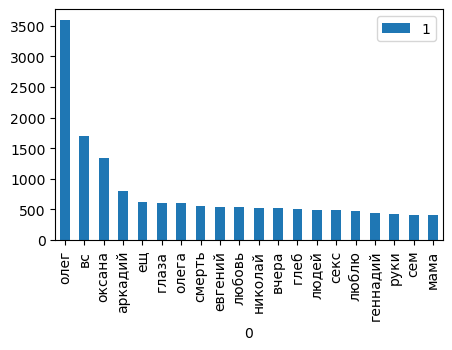

In [17]:
pd.DataFrame(filter(lambda x:x[0] not in stop_words.split('\n'),
                    Counter(re.findall('[а-я-]+',text)).items())).\
                    sort_values(by=1,ascending=False).head(20).plot(x=0,y=1,kind='bar',figsize=(5,3))

4. С помошью регулярных выражений, найти первое слово, встречающееся после имени Олег, во всех стихах.


In [18]:
pattern = re.compile(r"олег\s+(\w+)", re.IGNORECASE)

In [19]:
after_oleg = re.findall(pattern, text)

In [20]:
after_oleg[:10]

['распахивает',
 'потом',
 'еще',
 'и',
 'потеет',
 'один',
 'сидящий',
 'несёт',
 'не',
 'уволился']

In [21]:
len(after_oleg)

3577

5. Использовать облако слов, для визуализации п.4.

In [23]:
from wordcloud import WordCloud

In [24]:
text_raw = " ".join(after_oleg)

In [25]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(text_raw)

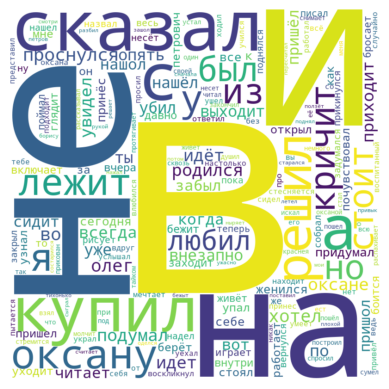

In [26]:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

6. Разделить исходный список на стихи (строка, включающая 4 переноса каретки)

7. Каждый полученный стих из 4. очистить от стоп-слов

In [27]:
def stop_words_rm(text):
  tmp = filter(lambda x:x not in stop_words.split('\n'),
                    re.findall('[а-я-]{3,}',text))
  return ' '.join(list(tmp))

In [28]:
text1 = [stop_words_rm(''.join(l[i-4:i])) for i in range(4,len(l[:5000]),5)]

In [29]:
text1

['руль спросил гагарин деревня буркнул корол спроси вожжи поехали скажи',
 'позитивный анатолий послан нахуй сумел бодрым отдохнувшим магнитика привез',
 'оксаной мном парке олег распахивает плащ оксана терпеливо',
 'ольгой овладели сперва тоска олег олег окончательно тоска',
 'смыл говно ребята негромко произнес олег волшебный вернуть',
 'любишь ролевые игры изобразить изобрази человека',
 'сперва сбежала собака коты смотрю рыбкам аквариум толкать дверям',
 'искусствоведов группа тихо восторженно глядит холст седой строгий отчетливо говно',
 'любимый взял локоть подв окну показал увижу вовеки заткнусь',
 'покосившемся заборе семен напишет жук детям почитать стыдно взрослым пища ума',
 'веселиться бер топор садимся круг игра простая бутылку топор',
 'полушарий оксаны привлекать самцов управляют остальными максимизируя поток',
 'пустую старую квартиру письмо приносит почтальон дед забери продленки увези',
 'лопатки рудименты крыльев сводит просветы меж домами тучами синева',
 'зависимы 

8. Векторизовать полученные стихи (каждый стих-строку превратить в вектор, где измерения -все слова, встречавшиеся во всех стихах, а значения в измерениях вектора - это частота этих слов, внутри соответствующего стиха). Таким образом, результат - это матрица стих-слово (документ-терм/токен)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vec = CountVectorizer()

words_arr = vec.fit_transform(text1)
words_matrix = words_arr.toarray()
unique_words = vec.get_feature_names_out()

In [32]:
sorted(vec.vocabulary_.keys())

['аборигены',
 'абрикосом',
 'август',
 'авиационных',
 'автобус',
 'автогеном',
 'автомат',
 'автомобиль',
 'автопилот',
 'автосварщику',
 'адекватных',
 'адидас',
 'админ',
 'адрес',
 'адъ',
 'аиста',
 'айболит',
 'айкью',
 'айфон',
 'академик',
 'аквариум',
 'аккомпанирует',
 'аккордеон',
 'акте',
 'активном',
 'активность',
 'акций',
 'алгоритму',
 'александра',
 'алкоголь',
 'алмазный',
 'алмазы',
 'альтаира',
 'альтернатива',
 'амангельды',
 'аморально',
 'ампутировал',
 'ампутированное',
 'аналоговых',
 'анатолий',
 'анатолия',
 'ангел',
 'ангелине',
 'ангиной',
 'андреевна',
 'андрей',
 'андрею',
 'андрюшу',
 'анна',
 'анну',
 'антиколумбы',
 'антон',
 'антона',
 'антракт',
 'антураж',
 'анфиса',
 'апостолов',
 'аппарат',
 'аппетит',
 'аппетитом',
 'апрель',
 'аптечка',
 'арестован',
 'аркадий',
 'аркадию',
 'аркадия',
 'арки',
 'армии',
 'армию',
 'арсений',
 'артур',
 'архангел',
 'архангелам',
 'ассенизатор',
 'ассистент',
 'ассоль',
 'асфальт',
 'асфальте',
 'атомной',
 'ат

9. С помощью метода главных компонент оставить только два измерения в каждом векторе, и визуализировать стихи с помощью диаграммы рассеяния

In [33]:
pca = PCA(n_components=2)

words_resuced = pca.fit_transform(words_matrix)

In [34]:
np.shape(words_resuced)

(1000, 2)

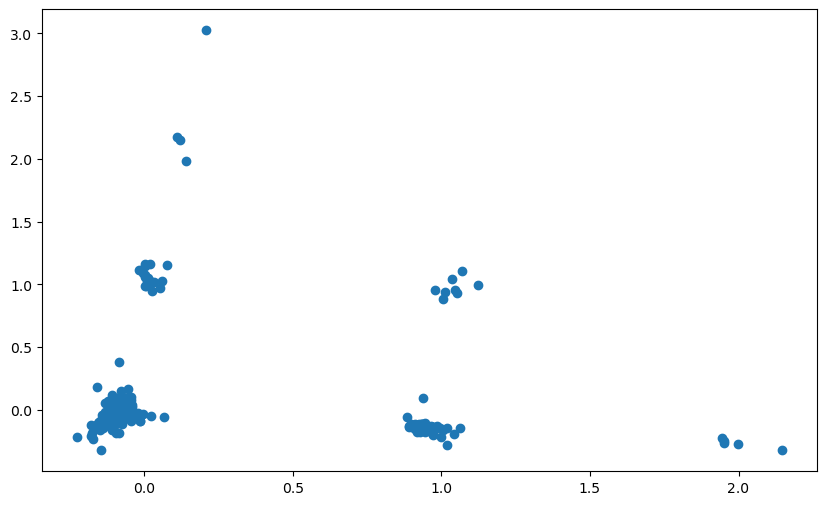

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(words_resuced[:, 0], words_resuced[:, 1])

10. С помощью частеречной разметки оставить в стихах только прилагательные и
подписать ими каждый стих, на графике из п.9.

In [39]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

In [36]:
%pip install -q pymorphy2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pymorphy2

In [40]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Raisa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Raisa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Raisa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [41]:
morph = pymorphy2.MorphAnalyzer()
pos_tagging = []

for i in range(len(text1)):
  words = word_tokenize(text1[i])
  #pos_tagging.append([morph.parse(w)[0].tag.POS for w in words])
  adj = [w for w in words if 'ADJF' in morph.parse(w)[0].tag]
  pos_tagging.append(' '.join(adj))

#print(pos_tagging)

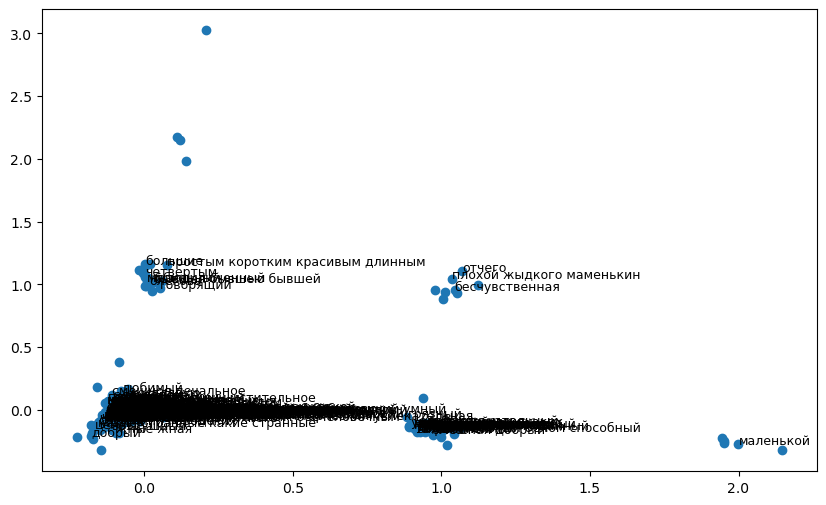

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(words_resuced[:, 0], words_resuced[:, 1])

for i, txt in enumerate(pos_tagging):
  plt.annotate(txt, (words_resuced[i, 0], words_resuced[i, 1]), fontsize=9)
